
# Nearest‑Neighbor Analysis and Visualization

This notebook reproduces the **Nearest Neighbor calculation** and **visualization** workflow


In [10]:
import numpy as np
import pandas as pd
import anndata as ad
import matplotlib.pyplot as plt
from spac.spatial_analysis import calculate_nearest_neighbor
from spac.visualization   import visualize_nearest_neighbor

## 1. Build synthetic AnnData

In [11]:

np.random.seed(42)
n_cells, n_genes = 500, 20

radii = np.random.choice([20, 40, 60], n_cells, p=[0.3, 0.4, 0.3])
theta = np.random.uniform(0, 2 * np.pi, n_cells)
x = radii * np.cos(theta) + np.random.normal(0, 2, n_cells)
y = radii * np.sin(theta) + np.random.normal(0, 2, n_cells)
clusters = np.where(radii < 30, "Cluster A",
           np.where(radii < 50, "Cluster B", "Cluster C"))
expr = np.random.poisson(lam=5, size=(n_cells, n_genes)).astype(np.float32)

adata = ad.AnnData(
    X=expr,
    obs=pd.DataFrame({"renamed_clusters": clusters}),
    var=pd.DataFrame(index=[f"gene_{i}" for i in range(n_genes)]),
)
adata.obsm["spatial"] = np.column_stack([x, y])

print("Synthetic AnnData created:", adata)


Synthetic AnnData created: AnnData object with n_obs × n_vars = 500 × 20
    obs: 'renamed_clusters'
    obsm: 'spatial'


/Users/liuf9/opt/anaconda3/envs/spac-3913/lib/python3.9/site-packages/anndata/_core/aligned_df.py:68: ImplicitModificationWarning:

Transforming to str index.



## 2. Calculate nearest neighbors

In [12]:

calculate_nearest_neighbor(
    adata=adata,
    annotation="renamed_clusters",
    spatial_associated_table="spatial",
    imageid=None,
    label="spatial_distance",
)
print("NN distances stored at adata.obsm['spatial_distance']")


Preparing data for spatial distance calculation...
Processing Image: dummy_image
Spatial distances stored in adata.obsm['spatial_distance']
Preview of the distance DataFrame:
    Cluster B  Cluster C  Cluster A
0   1.041409  18.468551  15.348297
1  16.954408   2.782708  41.461813
2  19.573017   1.262793  37.760295
3   2.033496  19.915092  13.655079
4  15.343961  36.190460   1.335909
NN distances stored at adata.obsm['spatial_distance']


## 3. Visualize distance distribution

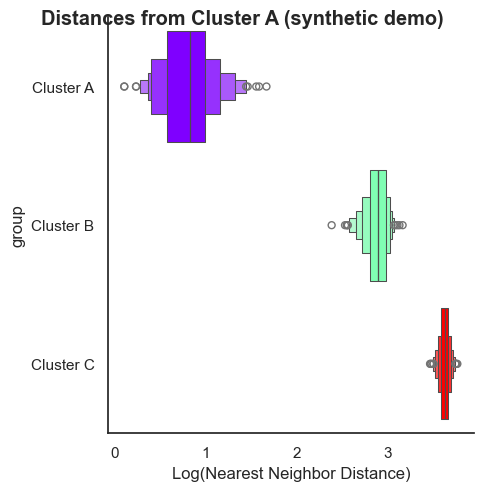

In [13]:

result = visualize_nearest_neighbor(
    adata=adata,
    annotation="renamed_clusters",
    spatial_distance="spatial_distance",
    distance_from="Cluster A",
    distance_to=None,          # None → to every other cluster
    plot_type="boxen",
    method="numeric",
    log=True,
)
result["fig"].suptitle("Distances from Cluster A (synthetic demo)", weight="bold")
plt.show()


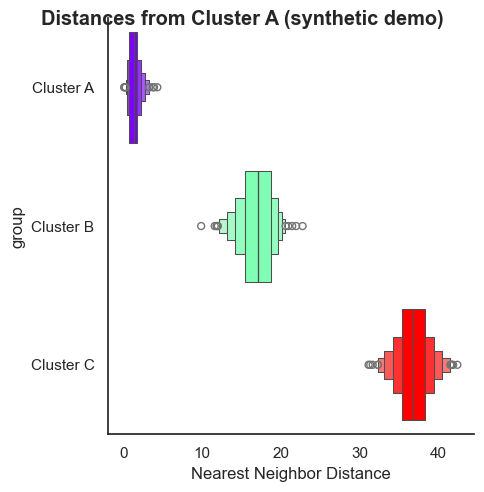

In [14]:
result = visualize_nearest_neighbor(
    adata=adata,
    annotation="renamed_clusters",
    spatial_distance="spatial_distance",
    distance_from="Cluster A",
    distance_to=None,          # None → to every other cluster
    plot_type="boxen",
    method="numeric",
    log=False,
)
result["fig"].suptitle("Distances from Cluster A (synthetic demo)", weight="bold")
plt.show()
